## COVID-19 FACE MASK DETECTION


## Our Team:
#### D20009 Chithra Nair
#### D20010 David Jose Paliakkara
#### D20012 Eric Gonsalves
#### D20013 Gadivemula Vamsitej
#### D20030 Saurabh Gupta 
 


In [1]:
#importing libraries and dataset
import cv2,os

data_path='updated_dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [2]:
#image preprocessing
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [3]:
#saving the dataset after reshaping
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [4]:
#saving the data
np.save('data2',data)
np.save('target2',new_target)

In [1]:
import numpy as np

data=np.load('data2.npy')
target=np.load('target2.npy')

#loading the save numpy arrays in the previous code

In [2]:
#definong the CNN and training the model
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
#train test split
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
import tensorflow as tf

In [4]:
#fitting the model
model.fit(train_data,train_target,epochs=10,batch_size=20,validation_split=0.2)

Epoch 1/10
136/136 [==============================] - 126s 924ms/step - loss: 0.5377 - accuracy: 0.7266 - val_loss: 0.3721 - val_accuracy: 0.8544
Epoch 2/10
136/136 [==============================] - 127s 931ms/step - loss: 0.3732 - accuracy: 0.8411 - val_loss: 0.3310 - val_accuracy: 0.8706
Epoch 3/10
136/136 [==============================] - 138s 1s/step - loss: 0.2476 - accuracy: 0.9073 - val_loss: 0.2164 - val_accuracy: 0.9132
Epoch 4/10
136/136 [==============================] - 137s 1s/step - loss: 0.1717 - accuracy: 0.9330 - val_loss: 0.2062 - val_accuracy: 0.9279
Epoch 5/10
136/136 [==============================] - 145s 1s/step - loss: 0.1500 - accuracy: 0.9371 - val_loss: 0.1838 - val_accuracy: 0.9397
Epoch 6/10
136/136 [==============================] - 136s 1s/step - loss: 0.1046 - accuracy: 0.9628 - val_loss: 0.1394 - val_accuracy: 0.9529
Epoch 7/10
136/136 [==============================] - 123s 907ms/step - loss: 0.0652 - accuracy: 0.9798 - val_loss: 0.1760 - val_accurac

In [5]:
model.evaluate(test_data,test_target)

12/12 [==============================] - 4s 349ms/step - loss: 0.2209 - accuracy: 0.9339


[0.22091306746006012, 0.9338624477386475]

In [18]:
model.predict(test_data)

array([[0.9953375 , 0.00466244]], dtype=float32)

In [6]:
#testing the model on test data
predictions = model.predict(test_data)
print(np.argmax(predictions[2]))

1


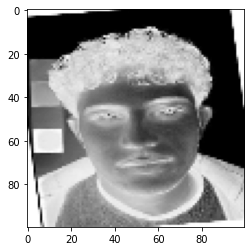

In [7]:
import matplotlib.pyplot as plt
plt.imshow(test_data[2],cmap=plt.cm.binary)
plt.show()

In [9]:
import cv2
import numpy as np

In [26]:
#testing the model on our own images

img=cv2.imread("C:\\Users\\DAVID\\anaconda3\\Code\\Dl_project\\face-mask-detection-keras-master\\with_mask.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))

In [72]:
img_r.shape

(1600, 1800, 3)

In [27]:
predictions = model.predict(reshaped)
print(np.argmax(predictions))

0


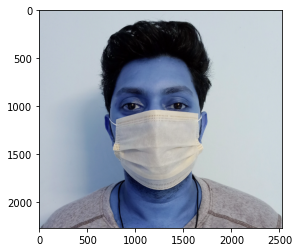

In [28]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
#the model predicted accurately

In [14]:
img2=cv2.imread("C:\\Users\\DAVID\\anaconda3\\Code\\Dl_project\\face-mask-detection-keras-master\\without_mask.jpg")
#img2_r=cv2.resize(img2,(1200,1200))
gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)           
#Coverting the image into gray scale
#resized=cv2.resize(gray,(50,50))
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped2=np.reshape(normalized,(1,100,100,1))

In [15]:
predictions2 = model.predict(reshaped2)
print(np.argmax(predictions2))

1


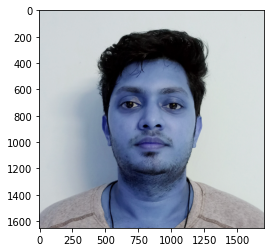

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img2,cmap=plt.cm.binary)
plt.show()

In [33]:
#using the live camera for mask detection
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')#using the already defined harcascade

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [34]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==ord('q')):#press q to close camera
        break
        
cv2.destroyAllWindows()
source.release()  
 

### screenshot of the live camera results given in report
